# **Proyecto 3 - Agrupación de datos sobre obesidad**
**Intengrates del equipo:** 

Oscar Ivan Echeverria Marrugo

Fabian Andrés Parrado Velásquez

Xiomara Grisales Henao 

Javier Callejas Cardozo

## **Explicacion breve:**
Este conjunto de datos incluye información para la estimación de los niveles de obesidad en individuos de los países de México, Perú y Colombia, basada en sus hábitos alimenticios y condición física. Los datos contienen 17 atributos y 2111 registros, los cuales están etiquetados con la variable de clase NObesity (Nivel de Obesidad), que permite la clasificación de los datos en los valores de Peso Insuficiente, Peso Normal, Sobrepeso Nivel I, Sobrepeso Nivel II, Obesidad Tipo I, Obesidad Tipo II y Obesidad Tipo III. El 77% de los datos se generó de manera sintética utilizando la herramienta Weka y el filtro SMOTE, mientras que el 23% de los datos se recolectó directamente de usuarios a través de una plataforma web.

## **Diccionario**

**Tipos de Variables:**

**Cualitativas (Categorías Nominales y Ordinales):** Las variables cualitativas permiten describir características o comportamientos, como Gender, family_history_with_overweight, CALC, etc.

**Cuantitativas (Continuas o Discretas):** Las variables numéricas (Age, Height, Weight, etc.) permiten cuantificar características de las personas del dataset.

| **Nombre de la   variable**                | **Definición**                                                  | **Valores**                                 |
|--------------------------------------------|-----------------------------------------------------------------|---------------------------------------------|
| **Variables   Cualitativas (Categorías):** |                                                                 |                                             |
| Gender:                                    | Género                                                          | (ej. "Male", "Female")                      |
| family_history_with_overweight:            | Historia familiar de sobrepeso                                  | (ej. "yes", "no")                           |
| FAVC:                                      | Frecuencia de consumo de alimentos con alto contenido calórico  | (ej. "yes", "no")                           |
| CAEC:                                      | Frecuencia de consumo de comida entre comidas                   | (ej. "Sometimes", "Frequently")             |
| SMOKE:                                     | Si la persona fuma                                              | (ej. "yes", "no")                           |
| SCC:                                       | Control del consumo de calorías                                 | (ej. "yes", "no")                           |
| CALC:                                      | Frecuencia de consumo de alcohol                                | (ej. "no", "Sometimes", "Frequently")       |
| MTRANS:                                    | Medio de transporte utilizado habitualmente                     | (ej. "Public_Transportation", "Walking")    |
| NObeyesdad:                                | Clasificación del peso                                          | (ej. "Normal_Weight", "Overweight_Level_I") |
| **Variables Numéricas:**                   |                                                                 |                                             |
| Age:                                       | Edad de la persona (en años)                                    |                                             |
| Height:                                    | Altura de la persona (en metros)                                |                                             |
| Weight:                                    | Peso de la persona (en kg)                                      |                                             |
| FCVC:                                      | Frecuencia de consumo de vegetales (valor numérico)             |                                             |
| NCP:                                       | Número de comidas principales diarias                           |                                             |
| CH2O:                                      | Consumo de agua diaria (valor numérico)                         |                                             |
| FAF:                                       | Frecuencia de actividad física semanal                          |                                             |
| TUE:                                       | Tiempo de uso de dispositivos electrónicos en horas.            |                                             |

## **Preprocesamiento de Datos**

## **Importación de Librerías**

Primero, importamos todas las librerías necesarias. Estas incluyen herramientas de manipulación de datos (pandas, numpy), visualización (seaborn, matplotlib).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import warnings
import math
from sklearn.preprocessing import StandardScaler, MinMaxScaler,  OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from joblib import dump
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans



## **Carga de los Datos**


Vamos a cargar el conjunto de datos que contienen información de de los niveles de obesidad en individuos de los países de México, Perú y Colombia, basada en sus hábitos alimenticios y condición física. Este dataset proviene de ObesityDataSet_raw_and_data_sinthetic.csv 

In [2]:
df_obesidad =pd.read_csv("../Datos/ObesityDataSet_raw_and_data_sinthetic.csv")

## **Exploración de la Base de Datos**


Es importante conocer la estructura de los datos antes de preprocesarlos. Vamos a visualizar las primeras filas y también la estructura de tipos de datos en cada columna por base de datos.


Visualizamos la base de datos



In [3]:
df_obesidad.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Visualizamos la cantidad de variables y registros del data set 

In [4]:
# cantidad de variables y registros
df_obesidad.shape

(2111, 17)

Se revisan los 3 primeros y 3 últimos registros del dataset, así también como las columnas, índices, tipos de registros y obtenemos una muestra aleatoria para conocer más los datos a analizar y conocer su comportamiento.

In [5]:
display("primeros 3 registros",df_obesidad.head(3))
display("3 últimos registros",df_obesidad.tail(3))
display("Columnas:",df_obesidad.columns)
display("Índices:",df_obesidad.index)
display("Tipos de registros en el DataFrame",df_obesidad.dtypes)
display("Muestra aleatoria de 3 registros",df_obesidad.sample(3))

'primeros 3 registros'

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight


'3 últimos registros'

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


'Columnas:'

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

'Índices:'

RangeIndex(start=0, stop=2111, step=1)

'Tipos de registros en el DataFrame'

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

'Muestra aleatoria de 3 registros'

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1627,Male,40.366238,1.722396,109.349025,yes,yes,2.281963,3.770379,Sometimes,no,1.0,no,1.330519,0.000000,no,Automobile,Obesity_Type_II
549,Female,29.970445,1.610863,49.516027,yes,yes,2.059138,3.904858,Frequently,no,2.0,no,0.821977,0.000000,no,Public_Transportation,Insufficient_Weight
666,Female,18.909439,1.732096,50.000000,no,yes,1.053534,3.378859,Sometimes,no,1.0,no,1.853425,0.861809,Sometimes,Public_Transportation,Insufficient_Weight


Vista rápida de la info del data set

In [6]:
df_obesidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

## **Eliminación de Columnas Irrelevantes** 
En muchos casos, algunos datos no aportan valor a nuestro modelo o pueden estar altamente correlacionados con otras variables, analizamos las filas duplicadas y los valores nulos.



In [7]:
#Análisis de filas duplicadas en la DB, calculamos las filas antes de eliminar las repetidas
print(f'Tamaño del set antes de eliminar las filas repetidas: {df_obesidad.shape}')
 
#Eliminamos filas duplicadas de la DB
df = df_obesidad.drop_duplicates()
#Impresión del tamaño del set luego de eliminar las duplicadas
 
print(f'Tamaño del set después de eliminar las filas repetidas: {df_obesidad.shape}')
#Se evidencia que no se encuentran valores duplicados
df_obesidad.head()

Tamaño del set antes de eliminar las filas repetidas: (2111, 17)
Tamaño del set después de eliminar las filas repetidas: (2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
# Identificar valores nulos
display(df_obesidad.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

No se evidencian datos duplicados ni valores nulos

## **Discriminación de las variables cuantitativas y cualitativas**

In [9]:
# Para identificar las variables numéricas
variables_numericas = df_obesidad.select_dtypes(include=['number']).columns

variables_numericas_all = df_obesidad.select_dtypes(include=['number']).columns

# Para identificar las variables cualitativas
variables_cualitativas = df_obesidad.select_dtypes(include=['object']).columns

# Mostrar los resultados
print("Variables numéricas:", variables_numericas)
print("Variables cualitativas:", variables_cualitativas)


Variables numéricas: Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')
Variables cualitativas: Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


### **Resumen:**

Cantidad de Variables y Registros: El dataset tiene 2111 filas y 17 columnas. 

Información del DataFrame (df_obesida.info()):

Las columnas tienen 2111 valores no nulos, lo que significa que no hay datos faltantes.

Tipos de datos:
8 columnas son de tipo float64, correspondientes a variables numéricas.
9 columnas son de tipo object, correspondientes a variables cualitativas.

**Variables Numéricas:**
Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE

**Variables Cualitativas:**
Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad

En resumen, el dataset consta de 2111 registros y 17 variables, de las cuales 8 son numéricas y 9 son cualitativas, sin valores nulos en ninguna columna.

## **Cálculo de Estadísticos** 



Cálculos de estadísticos para las variables cuantitativas

In [10]:
df_obesidad.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### **Histogramas variables cuantitativas** 

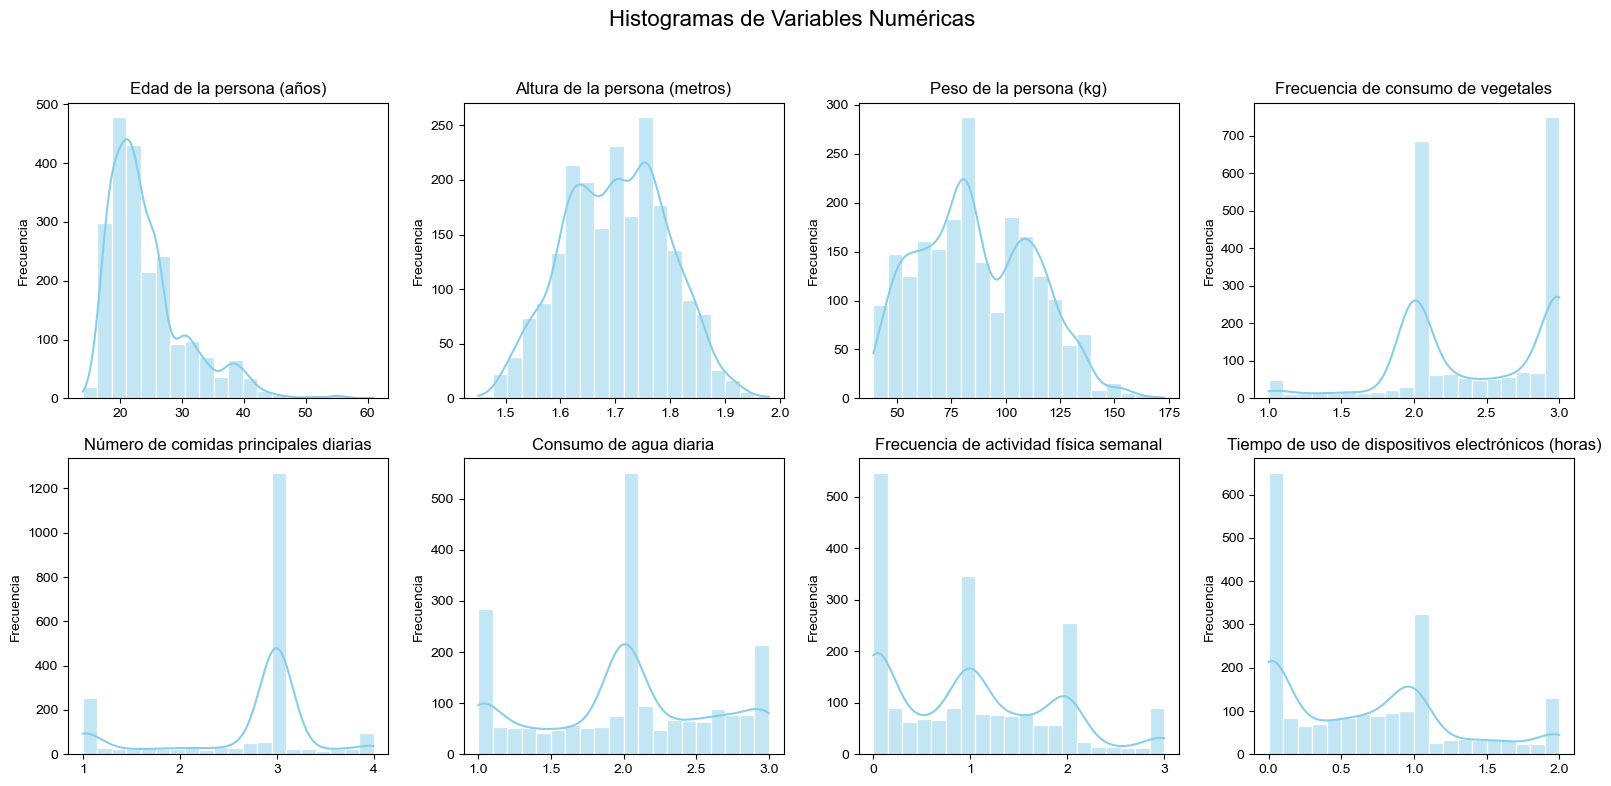

In [11]:

var_cuantitativas = df_obesidad[variables_numericas_all]

# Diccionario con los nombres de las etiquetas de los ejes
etiquetas_ejes = {
    "Age": "Edad de la persona (años)",
    "Height": "Altura de la persona (metros)",
    "Weight": "Peso de la persona (kg)",
    "FCVC": "Frecuencia de consumo de vegetales",
    "NCP": "Número de comidas principales diarias",
    "CH2O": "Consumo de agua diaria",
    "FAF": "Frecuencia de actividad física semanal",
    "TUE": "Tiempo de uso de dispositivos electrónicos (horas)"
}

# Crea un layout de 2 filas y 4 columnas
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Histogramas de Variables Numéricas', fontsize=16)

# Configura estilo de Seaborn
sns.set(style="whitegrid")

# Genera histogramas para cada columna en el DataFrame
for i, column in enumerate(var_cuantitativas.columns):
    row, col = divmod(i, 4)  # Calcula la posición en el grid
    sns.histplot(var_cuantitativas[column], bins=20, kde=True, ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(etiquetas_ejes.get(column, "Valor de la Variable"))
    
    # Añadir etiqueta en español para el eje Y
    axes[row, col].set_ylabel("Frecuencia")
    axes[row, col].set_xlabel("")

# Ajusta el espacio entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### **Diagrama de cajas para las variables cuantitativas antes de normalizar**

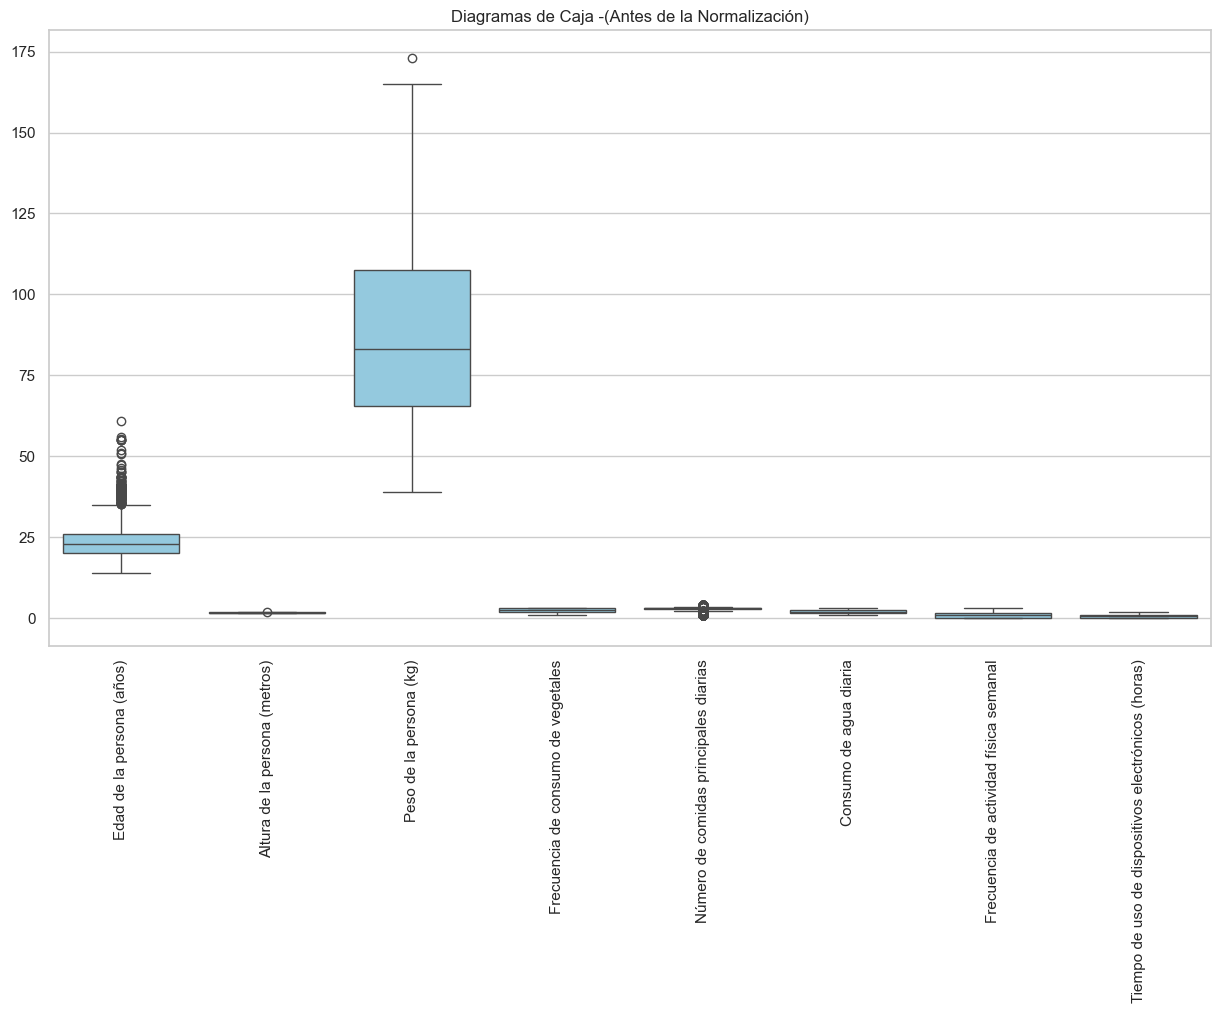

In [12]:
# Ignorar advertencias de futuros cambios
warnings.filterwarnings('ignore', category=FutureWarning)

# Crear un diagrama de caja para las columnas numéricas
plt.figure(figsize=(15, 8))
sns.boxplot(data=var_cuantitativas, color="skyblue")  # Cambiar color a skyblue
plt.title('Diagramas de Caja -(Antes de la Normalización)')

# Cambiar etiquetas del eje X usando el diccionario
plt.xticks(ticks=range(len(var_cuantitativas.columns)), labels=[etiquetas_ejes.get(col, col) for col in var_cuantitativas.columns], rotation=90)

plt.xticks(rotation=90)
plt.show()


### **Diagrama de cajas para las variables cuantitativas después de normalizar**

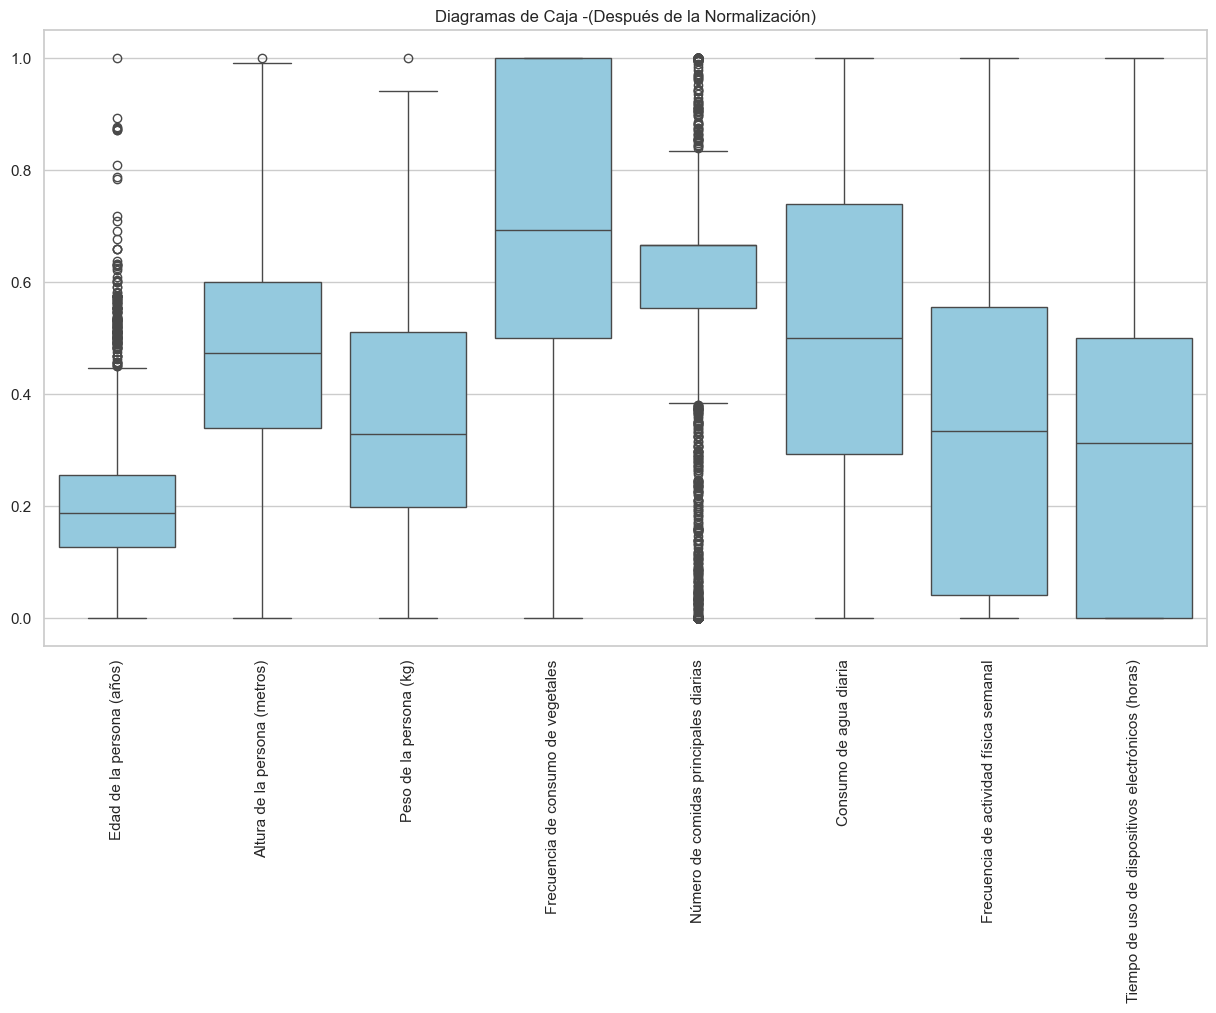

In [13]:
scaler = MinMaxScaler()
# ajustar y transformar el data frame del vino blanco = 1
scaled_data = scaler.fit_transform(var_cuantitativas)
# convertir los datos escalados a data frame y mantener los nombres de las columnas
df_scaled = pd.DataFrame(scaled_data, columns=var_cuantitativas.columns)

# Ignorar advertencias de futuros cambios
warnings.filterwarnings('ignore', category=FutureWarning)

# Crear un diagrama de caja para las columnas numéricas
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_scaled, color="skyblue")  # Cambiar color a skyblue
plt.title('Diagramas de Caja -(Después de la Normalización)')

# Cambiar etiquetas del eje X usando el diccionario
plt.xticks(ticks=range(len(var_cuantitativas.columns)), labels=[etiquetas_ejes.get(col, col) for col in var_cuantitativas.columns], rotation=90)

plt.xticks(rotation=90)
plt.show()

### **Histogramas variables cualitativas** 

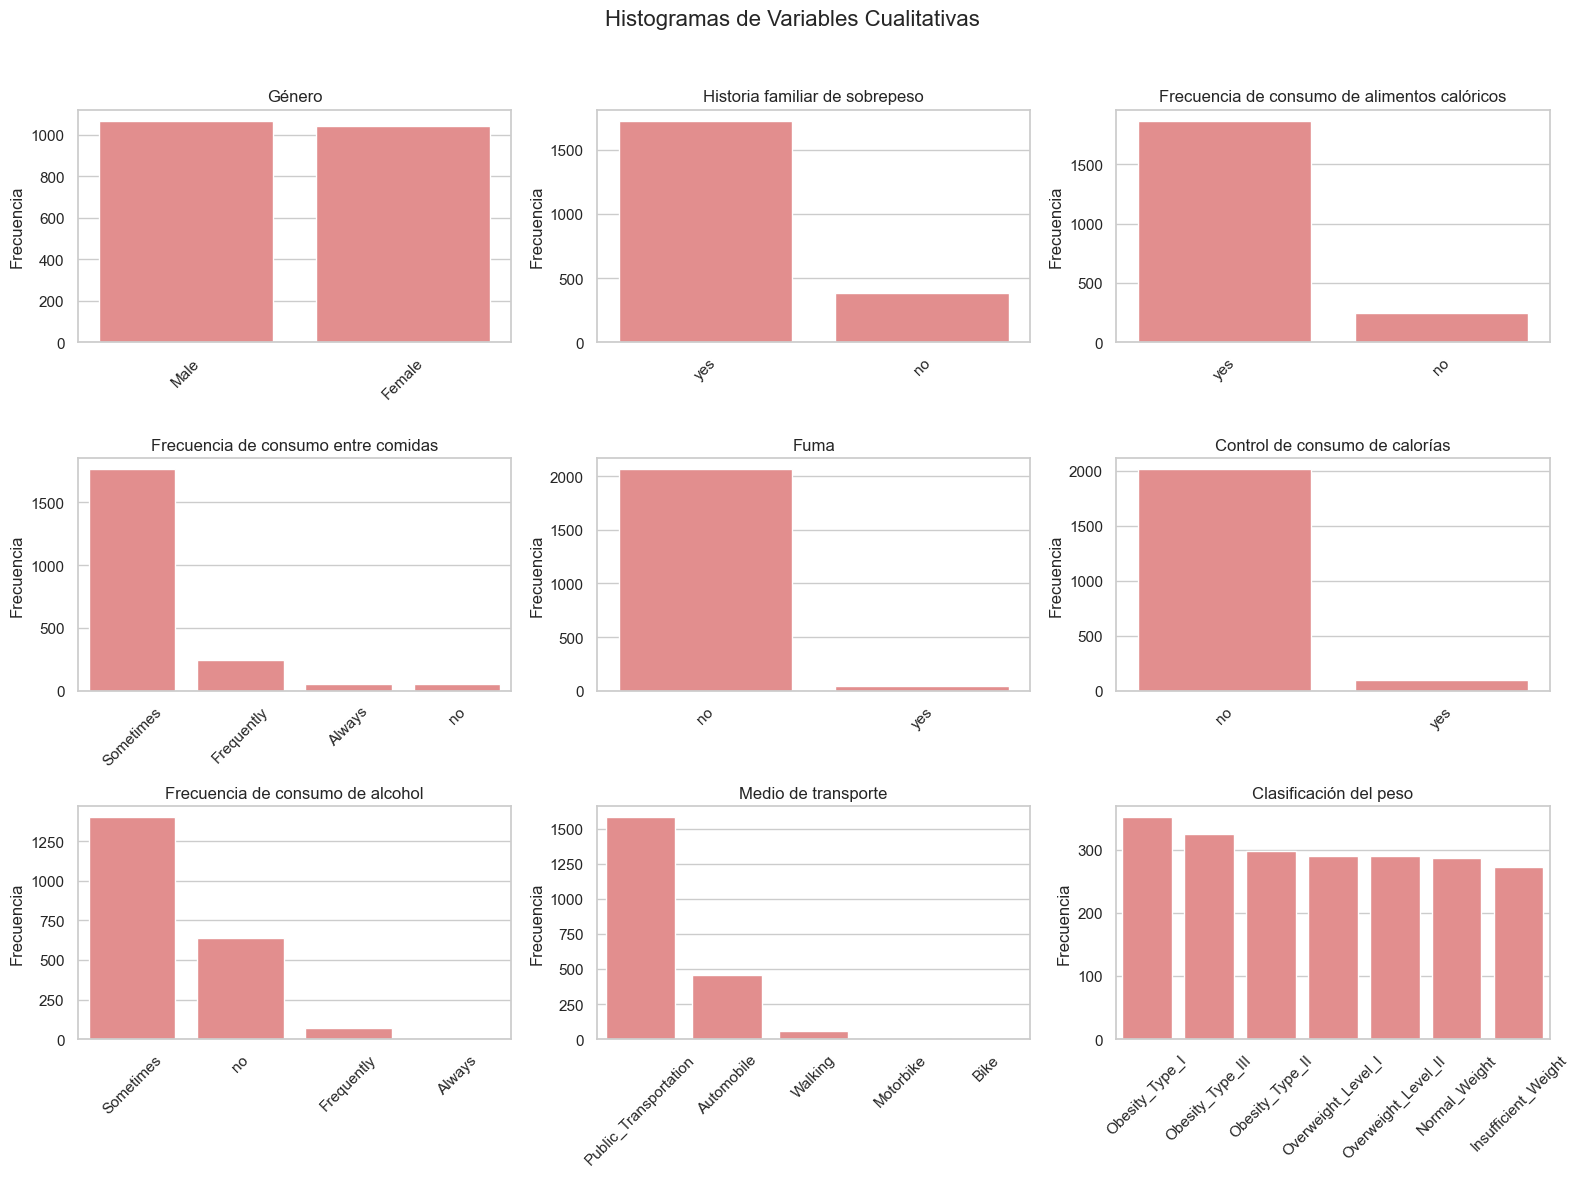

In [14]:
var_cualitativas = df_obesidad[variables_cualitativas]

# Diccionario con nombres más descriptivos para las etiquetas de cada variable (si aplica)
etiquetas_cualitativas = {
    "Gender": "Género",
    "family_history_with_overweight": "Historia familiar de sobrepeso",
    "FAVC": "Frecuencia de consumo de alimentos calóricos",
    "CAEC": "Frecuencia de consumo entre comidas",
    "SMOKE": "Fuma",
    "SCC": "Control de consumo de calorías",
    "CALC": "Frecuencia de consumo de alcohol",
    "MTRANS": "Medio de transporte",
    "NObeyesdad": "Clasificación del peso"
}

# Crea un layout de 3 filas y 3 columnas
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
fig.suptitle('Histogramas de Variables Cualitativas', fontsize=16)

# Genera gráficos de barras para cada variable en el DataFrame
for i, column in enumerate(var_cualitativas.columns):
    row, col = divmod(i, 3)  # Calcula la posición en el grid
    
    # Obtén los conteos de cada categoría
    conteos = var_cualitativas[column].value_counts()
    
    # Grafica los conteos como barras
    sns.barplot(x=conteos.index, y=conteos.values, ax=axes[row, col], color="lightcoral")
    axes[row, col].set_title(etiquetas_cualitativas.get(column, column))  # Usamos el diccionario correctamente
    
    # Añade etiquetas en español para los ejes
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Frecuencia")

    # Rotar etiquetas en el eje X si son largas
    axes[row, col].tick_params(axis='x', rotation=45)

# Ajusta el espacio entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### **Mapa de Calor y Matriz de Correlación**

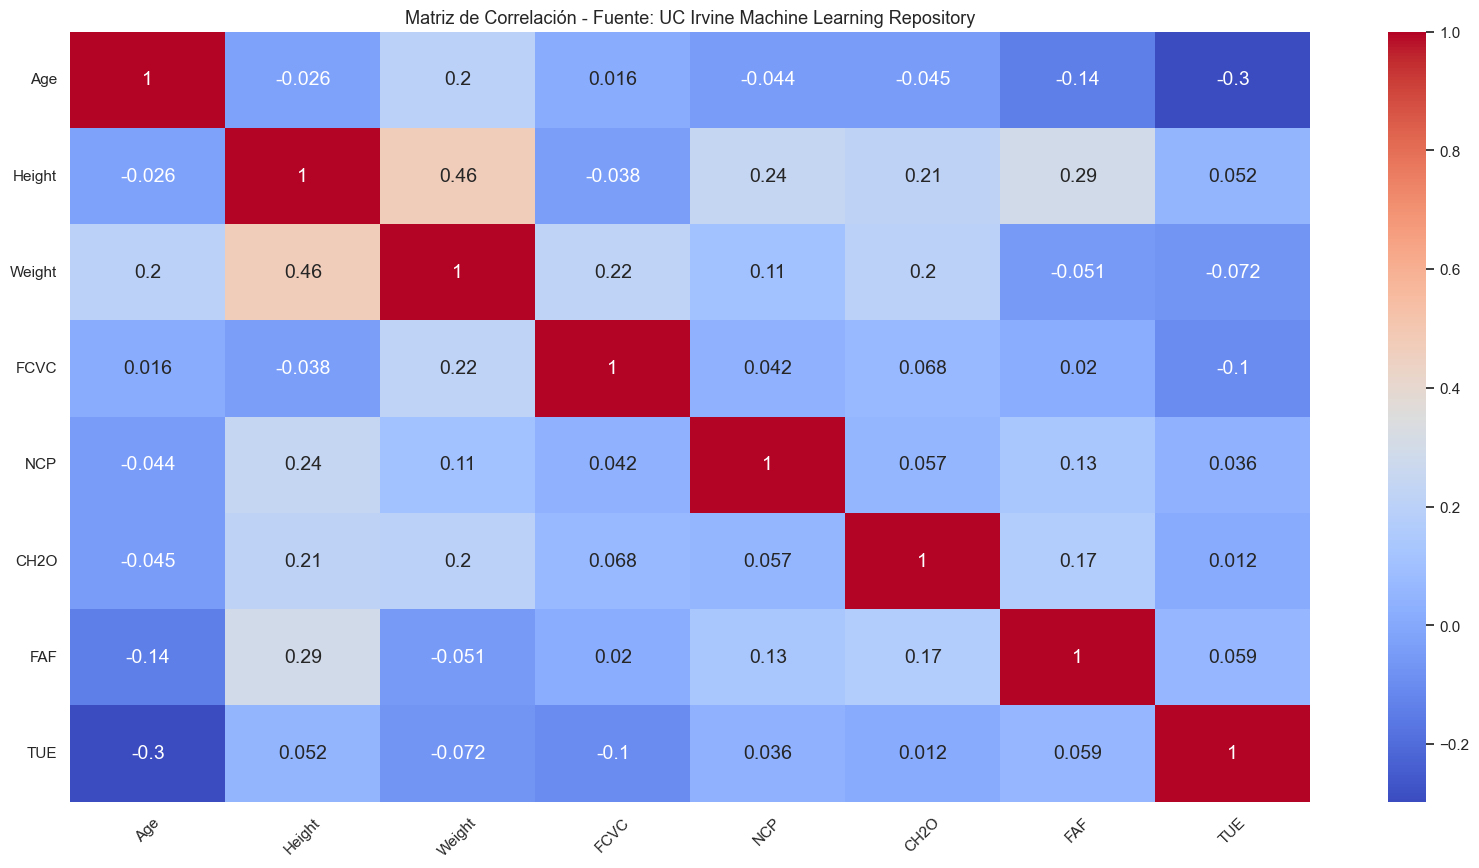

In [15]:
# Creación de la matriz de correlación
corr_type = var_cuantitativas.corr()

# Crear la figura y el eje
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Mapa de calor para la matriz de correlación con rotación en las etiquetas
sns.heatmap(corr_type, annot=True, cmap='coolwarm', ax=ax, annot_kws={"size": 14})

# Configuración del título y las etiquetas
ax.set_title('Matriz de Correlación - Fuente: UC Irvine Machine Learning Repository', fontsize=13)
ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=0)

# Ajustar el espacio entre subplots
plt.show()

In [16]:
# Mostrar la matriz de correlación 
print("Matriz de correlación")
print(corr_type)
print("\n" + "="*50 + "\n")

Matriz de correlación
             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.025958  0.202560  0.016291 -0.043944 -0.045304 -0.144938   
Height -0.025958  1.000000  0.463136 -0.038121  0.243672  0.213376  0.294709   
Weight  0.202560  0.463136  1.000000  0.216125  0.107469  0.200575 -0.051436   
FCVC    0.016291 -0.038121  0.216125  1.000000  0.042216  0.068461  0.019939   
NCP    -0.043944  0.243672  0.107469  0.042216  1.000000  0.057088  0.129504   
CH2O   -0.045304  0.213376  0.200575  0.068461  0.057088  1.000000  0.167236   
FAF    -0.144938  0.294709 -0.051436  0.019939  0.129504  0.167236  1.000000   
TUE    -0.296931  0.051912 -0.071561 -0.101135  0.036326  0.011965  0.058562   

             TUE  
Age    -0.296931  
Height  0.051912  
Weight -0.071561  
FCVC   -0.101135  
NCP     0.036326  
CH2O    0.011965  
FAF     0.058562  
TUE     1.000000  




In [17]:
# Variables mejor relacionadas con peso 'weight'
correlaciones = corr_type['Weight'].sort_values(ascending=False)
print("\nCorrelaciones con respecto al peso 'weight'")
print(correlaciones)


Correlaciones con respecto al peso 'weight'
Weight    1.000000
Height    0.463136
FCVC      0.216125
Age       0.202560
CH2O      0.200575
NCP       0.107469
FAF      -0.051436
TUE      -0.071561
Name: Weight, dtype: float64


## **Hipótesis**

Hipótesis 1: Las personas con un historial familiar de sobrepeso (family_history_with_overweight), edad avanzada,NCP: Número de comidas principales diarias y CH2O: Consumo de agua diaria (valor numérico),  tienen mayor probabilidad de presentar sobrepeso u obesidad (NObeyesdad).

Hipótesis 2: El consumo frecuente de alimentos altos en calorías (FAVC) está asociado con un aumento en el nivel de obesidad.

Hipótesis 3: La frecuencia de actividad física (FAF) tiene una correlación negativa con el nivel de obesidad (NObeyesdad), es decir, a mayor actividad física, menor nivel de obesidad.

In [18]:
df_obesidad['family_history_with_overweight'] = df_obesidad['family_history_with_overweight'].astype('category')
df_obesidad['NObeyesdad'] = df_obesidad['NObeyesdad'].astype('category')
df_obesidad['FAVC'] = df_obesidad['FAVC'].astype('category')
df_obesidad['Gender'] = df_obesidad['Gender'].astype('category')

Explicación:

df['Weight']: Esto toma el valor de la columna de peso.

df['Height']: Esto toma el valor de la columna de altura.

Fórmula del IMC: Se aplica la fórmula 

$$
IMC = \frac{\text{Peso (kg)}}{\text{Altura (m)}^2}
$$


La nueva columna IMC se agrega al DataFrame.

In [19]:
# Crear la columna IMC
df_obesidad['IMC'] = df_obesidad['Weight'] / (df_obesidad['Height'] ** 2)

# Ver las primeras filas para confirmar
df_obesidad[['Weight', 'Height', 'IMC']].head()

,Weight,Height,IMC
0,64.0,1.62,24.386526
1,56.0,1.52,24.238227
2,77.0,1.80,23.765432
3,87.0,1.80,26.851852
4,89.8,1.78,28.342381


### **Hipótesis 1:**
"Las personas que tienen antecedentes familiares de sobrepeso (family_history_with_overweight) tienen más probabilidades de tener sobrepeso o ser obesas (NObeyesdad)."

**Razonamiento:** Usaremos una prueba chi-cuadrado para ver si existe una relación significativa entre la variable "family_history_with_overweight" y la clasificación de peso "NObeyesdad".

In [20]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df_obesidad['family_history_with_overweight'], df_obesidad['NObeyesdad'])

# Realizar la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-cuadrado: {chi2}")
print(f"P-valor: {p}")

Chi-cuadrado: 621.9794353945297
P-valor: 4.2280167944705074e-131


Interpretación:
El valor de Chi-cuadrado (621.98) es un indicador de cuán lejos están las observaciones reales de las esperadas bajo la hipótesis nula.
El P-valor extremadamente bajo (
4.23
×
1
0
−
131
4.23×10 
−131
 ) indica que los resultados son muy significativos.
Con un P-valor tan pequeño, rechazarías la hipótesis nula. Esto significa que hay evidencia estadística sólida para aceptar la hipótesis alternativa.

### **Hipótesis 2:**
"El consumo frecuente de alimentos calóricos (FAVC) está relacionado con un mayor índice de masa corporal (IMC) o con mayor obesidad (NObeyesdad)."

Cómo probarla:

Método estadístico: Prueba t de Student o ANOVA.
Razonamiento: Comparamos el índice de masa corporal (o una variable que represente el peso) entre los grupos "yes" y "no" de la variable "FAVC". Si los promedios difieren significativamente, podemos rechazar la hipótesis nula de que no hay relación.

In [21]:
from scipy.stats import ttest_ind

# Dividir los datos por grupos de consumo de alimentos calóricos
group_yes = df_obesidad[df_obesidad['FAVC'] == 'yes']['IMC']  # Cambia 'IMC' si tienes otra variable para el índice de obesidad
group_no = df_obesidad[df_obesidad['FAVC'] == 'no']['IMC']

# Realizar la prueba t de Student
t_stat, p_value = ttest_ind(group_yes, group_no)

print(f"T-Estadístico: {t_stat}")
print(f"P-valor: {p_value}")

T-Estadístico: 11.660315740493845
P-valor: 1.7150721919434586e-30


Interpretación:
El t-Estadístico (11.66) es un valor que mide la diferencia entre la media de las muestras comparadas, normalizado por la desviación estándar.
El P-valor (
1.72
×
1
0
−
30
1.72×10 
−30
 ) es tan pequeño que sugiere que es muy improbable que la diferencia observada entre las muestras haya ocurrido por casualidad.
Dado el P-valor extremadamente bajo, puedes rechazar la hipótesis nula, lo que implica que hay una diferencia significativa entre las muestras comparadas.

### **Hipótesis 3:**
"El género (Gender) influye en la clasificación de obesidad (NObeyesdad) en los países de México, Perú y Colombia."

Cómo probarla:

Método estadístico: Prueba de Chi-cuadrado o Regresión logística.
Razonamiento: Queremos ver si hay una relación significativa entre el género y la clasificación de obesidad en diferentes países. Usaremos una prueba chi-cuadrado para ver si las distribuciones de género varían según la clasificación de obesidad en estos países.

In [22]:
# Crear una tabla de contingencia para género y obesidad por país
contingency_table_gender = pd.crosstab([df_obesidad['Gender']], df['NObeyesdad'])

# Realizar la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table_gender)

print(f"Chi-cuadrado: {chi2}")
print(f"P-valor: {p}")

Chi-cuadrado: 657.452977574262
P-valor: 9.357967638719802e-139


Interpretación:
El valor de Chi-cuadrado (657.45) indica que las observaciones reales están lejos de las expectativas bajo la hipótesis nula.
El P-valor (
9.36
×
1
0
−
139
9.36×10 
−139
 ) es extremadamente pequeño, lo que significa que los resultados son altamente significativos.
Al igual que en el caso de la primera hipótesis, el P-valor tan pequeño indica que se rechazaría la hipótesis nula, lo que significa que hay evidencia sólida para aceptar la hipótesis alternativa.

**Conclusión General:**

En todas las hipótesis, los P-valores extremadamente bajos son una fuerte señal de que las hipótesis nulas deben ser rechazadas. Esto sugiere que en todos los casos, los resultados observados son muy improbables bajo la hipótesis nula y apoyan las hipótesis alternativas que podrían sugerir diferencias significativas o relaciones entre las variables en tu análisis.

## **Agrupamiento de los datos** 

### **Método Kmeans para agrupar por clúster**

In [30]:
#variables_cuantitativas = df_obesidad.select_dtypes(include=['number'])
# Lista las columnas numéricas y excluye las dos variables deseadas

columnas_cuantitativas = df_obesidad.select_dtypes(include=['number']).columns.drop(['Height', 'Weight', 'IMC'])
variables_cuantitativas = df_obesidad[columnas_cuantitativas]


### **Método del codo para definir número de clústers**

In [34]:

# Seleccionar las variables cuantitativas del dataset
#variables_cuantitativas = df_obesidad.select_dtypes(include=['number'])

# Normalizar las variables cuantitativas
scaler = StandardScaler()
variables_cuantitativas_scaled = scaler.fit_transform(variables_cuantitativas)
variables_cuantitativas_scaled


array([[-0.52212439, -0.7850187 ,  0.40415272, -0.01307326, -1.18803911,
         0.56199675],
       [-0.52212439,  1.08834176,  0.40415272,  1.61875854,  2.33975012,
        -1.08062463],
       [-0.20688898, -0.7850187 ,  0.40415272, -0.01307326,  1.16382038,
         0.56199675],
       ...,
       [-0.28190933,  1.08834176,  0.40415272,  0.0753606 ,  0.47497132,
        -0.01901815],
       [ 0.00777624,  1.08834176,  0.40415272,  1.37780063,  0.15147069,
        -0.11799101],
       [-0.10211908,  1.08834176,  0.40415272,  1.39603472,  0.01899633,
         0.09243207]])

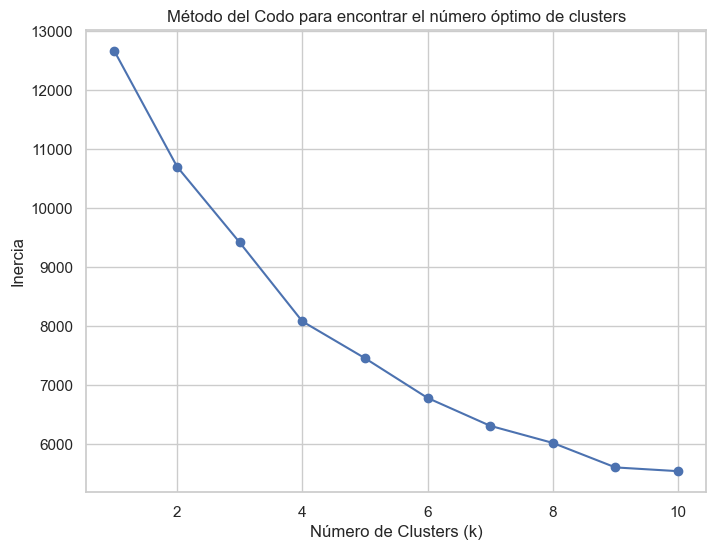

In [ ]:

# Usamos el método del codo para encontrar el número óptimo de clusters 
inertia = []
k_values = range(1, 11) # Probaremos de 1 a 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(variables_cuantitativas_scaled)
    inertia.append(kmeans.inertia_)
        
# Graficamos el método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o') 
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para encontrar el número óptimo de clusters') 
plt.show()

### **Método de la silueta para definir número de clústers**

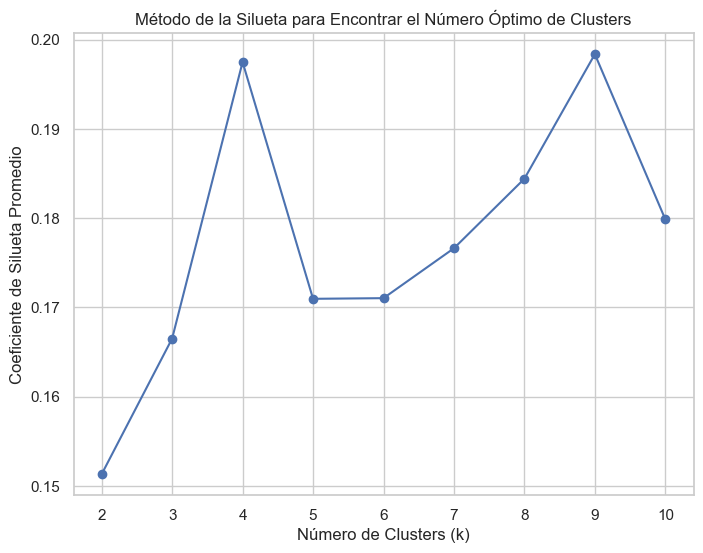

In [58]:
# Rango de valores de k a probar 
range_n_clusters = range(2, 11)
silhouette_avg = []

# Iterar sobre diferentes valores de k
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(variables_cuantitativas_scaled)  # X_scaled es el conjunto de datos escalado
    
    # Calcular la puntuación de silueta media para el valor de k 
    silhouette_avg.append(silhouette_score(variables_cuantitativas_scaled, cluster_labels))

# Visualizar los resultados
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.title("Método de la Silueta para Encontrar el Número Óptimo de Clusters")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Coeficiente de Silueta Promedio")
plt.show()

### **Coeficientes de silueta para Kmeans y silhouette score**

In [74]:
# Coeficientes de silueta para diferentes valores de k
range_n_clusters=range(2, 11)
silhouette_coefficients = []

for n_clusters in range_n_clusters:
    kmeans = KMeans (n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(variables_cuantitativas_scaled)
    silhouette_avg = silhouette_score (variables_cuantitativas_scaled, cluster_labels)
    silhouette_coefficients.append(silhouette_avg)

    print(f"Para el cluster = {n_clusters}, el coeficiente de silueta promedio es {silhouette_avg}")

Para el cluster = 2, el coeficiente de silueta promedio es 0.16912441858870542
Para el cluster = 3, el coeficiente de silueta promedio es 0.2046800594886526
Para el cluster = 4, el coeficiente de silueta promedio es 0.23168951908069577
Para el cluster = 5, el coeficiente de silueta promedio es 0.1903149638887036
Para el cluster = 6, el coeficiente de silueta promedio es 0.17855274508203905
Para el cluster = 7, el coeficiente de silueta promedio es 0.17363660957451507
Para el cluster = 8, el coeficiente de silueta promedio es 0.19506350139242487
Para el cluster = 9, el coeficiente de silueta promedio es 0.18985897182813996
Para el cluster = 10, el coeficiente de silueta promedio es 0.19969520291309278


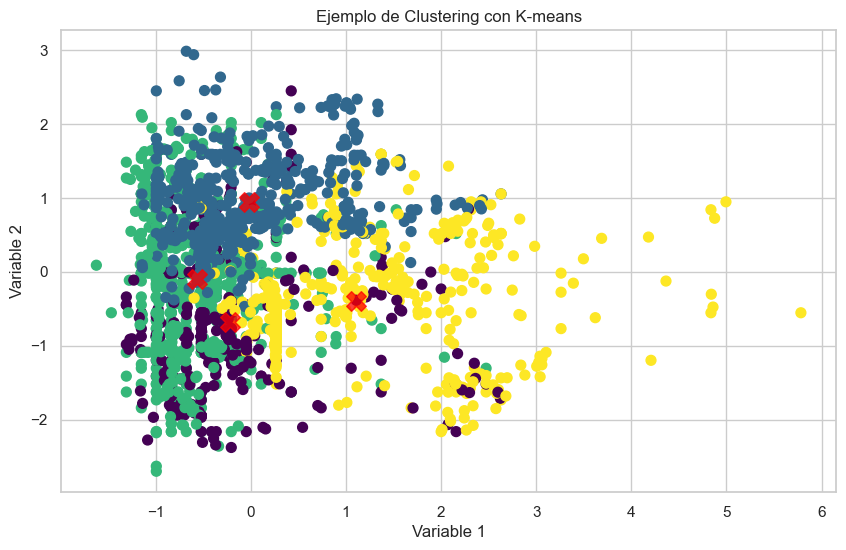

In [83]:
# Aplicación de K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(variables_cuantitativas_scaled)
y_kmeans = kmeans.predict(variables_cuantitativas_scaled)

# Centros de los clusters
centers = kmeans.cluster_centers_

# Visualización de los clusters
plt.figure(figsize=(10, 6))
plt.scatter(variables_cuantitativas_scaled[:, 0], variables_cuantitativas_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Ejemplo de Clustering con K-means')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.show()


### **Reducción de Dimensionalidad con PCA con 4 clústers**

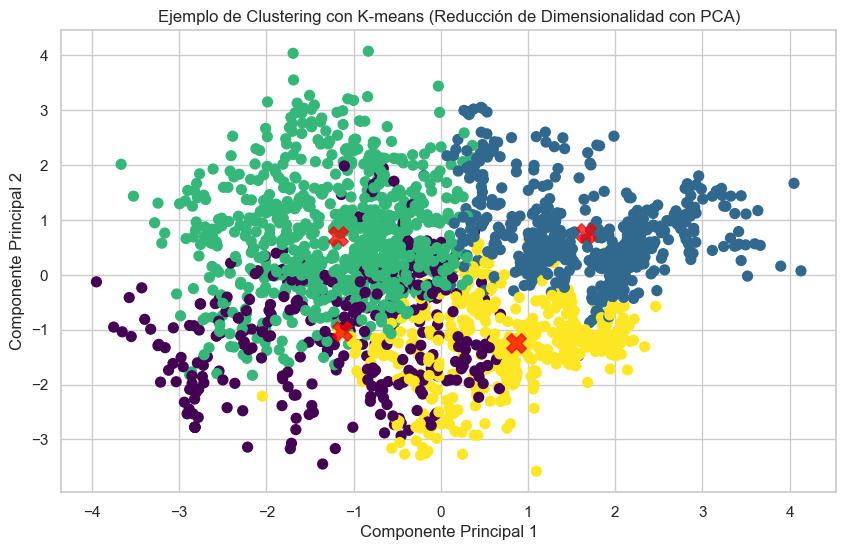

In [84]:
# Seleccionar las variables cuantitativas del dataset
variables_cuantitativas = df_obesidad.select_dtypes(include=['number'])

# Normalizar las variables cuantitativas
scaler = StandardScaler()
variables_cuantitativas_scaled = scaler.fit_transform(variables_cuantitativas)

# Aplicación de K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(variables_cuantitativas_scaled)
y_kmeans = kmeans.predict(variables_cuantitativas_scaled)

# Reducción de dimensionalidad usando PCA
pca = PCA(n_components=2)
variables_pca = pca.fit_transform(variables_cuantitativas_scaled)
centers_pca = pca.transform(kmeans.cluster_centers_)

# Visualización de los clusters
plt.figure(figsize=(10, 6))
plt.scatter(variables_pca[:, 0], variables_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Ejemplo de Clustering con K-means (Reducción de Dimensionalidad con PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [85]:
#Agregar las etiquetas de los clusters al DataFrame original 
df_obesidad['Cluster'] = y_kmeans
df_obesidad.head()



,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,IMC,Cluster
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526,2
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227,2
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432,2
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852,1
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,0


In [88]:
# Calcular la media de cada variable cuantitativa para cada cluster
cluster_means = df_obesidad.groupby('Cluster')[['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].mean()
                           
#Mostrar las medias
print(cluster_means)

               Age      FCVC       NCP      CH2O       FAF       TUE
Cluster                                                             
0        22.942851  2.344976  1.183379  1.910053  0.769041  0.648365
1        24.155760  2.517871  2.864853  2.297332  1.356830  0.702861
2        20.709166  2.281128  3.118420  1.905113  1.227017  0.841271
3        31.314310  2.585207  2.870113  1.921293  0.445479  0.317303


### **Diagramas de caja de la distribución de cada variable dentro de cada cluster**

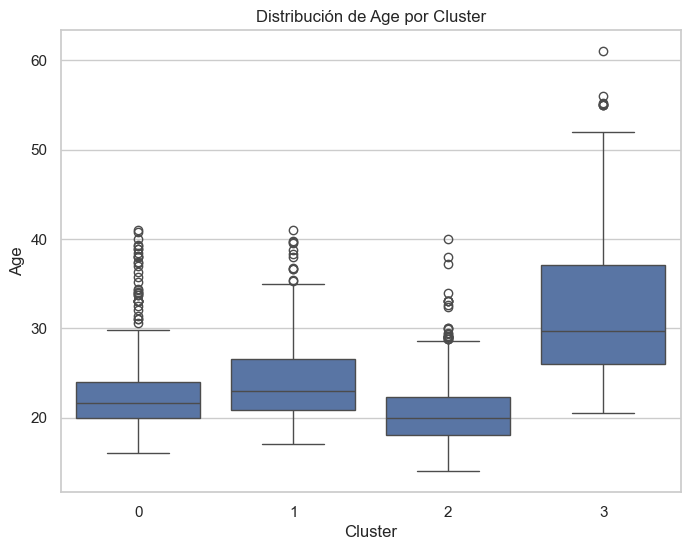

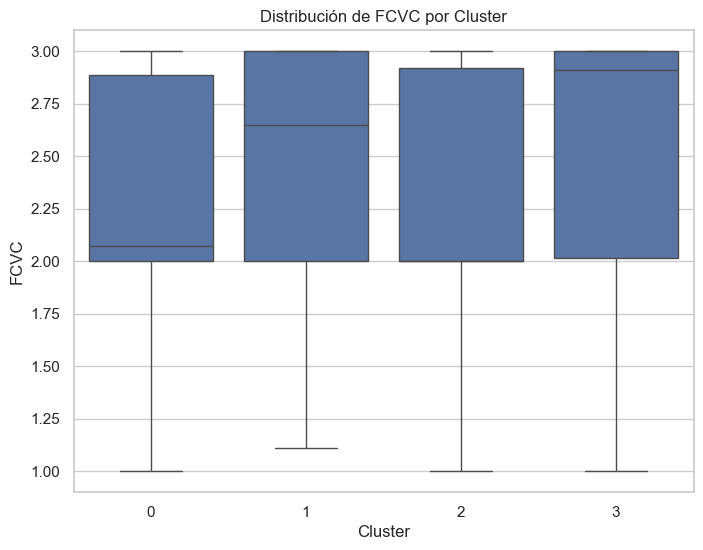

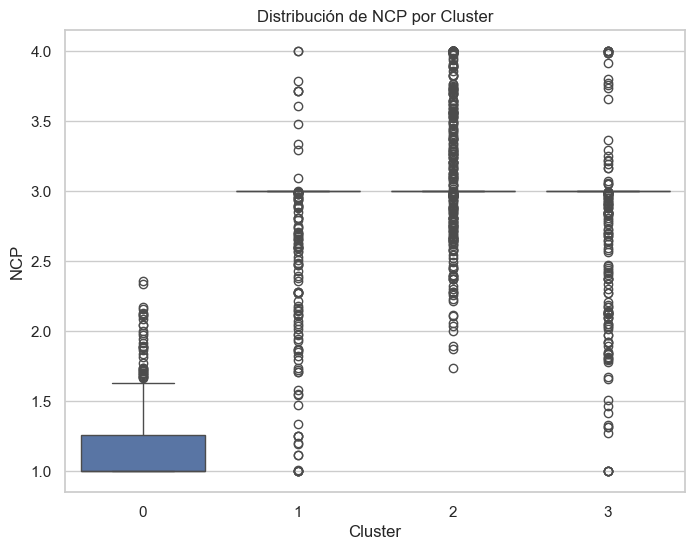

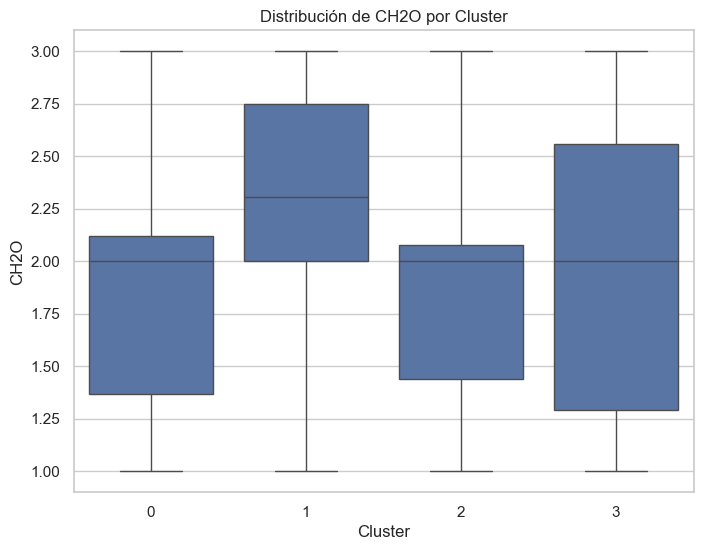

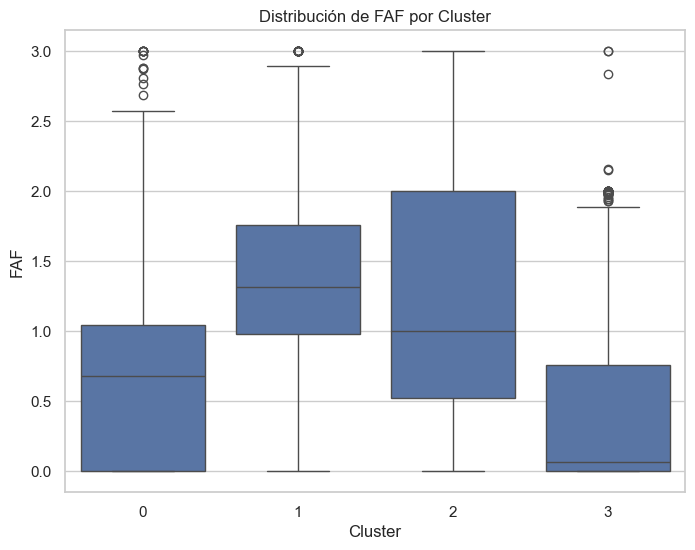

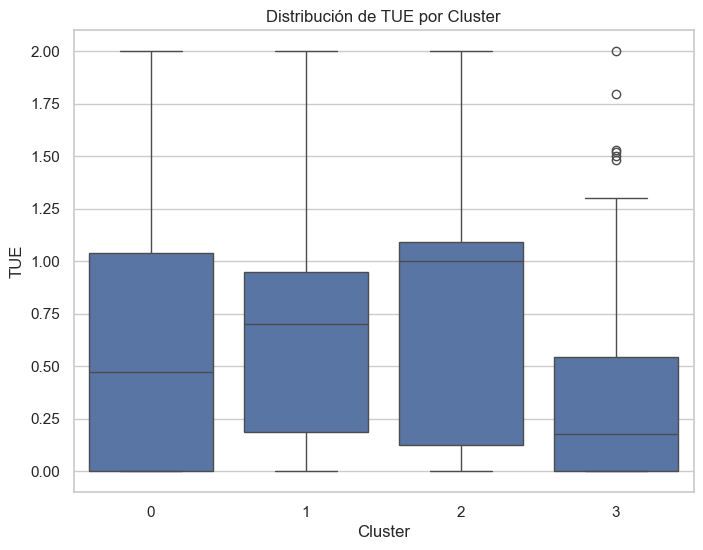

In [95]:
#Visualización de la distribución de cada variable dentro de cada cluster 

for column in ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=column, data=df_obesidad) 
    plt.title(f'Distribución de {column} por Cluster')
    plt.show()

### **Análsis variables categóricas**

In [ ]:
df_obesidad_v2 = pd.DataFrame(np.transpose(np.array([df_obesidad['NObeyesdad'], df_obesidad['FAVC']])), columns=['NObeyesdad', 'FAVC'])
df_obesidad_v2.describe()


,NObeyesdad,FAVC
count,2111,2111
unique,7,2
top,Obesity_Type_I,yes
freq,351,1866


In [ ]:
# Seleccionar las columnas categóricas que se desean transformar
df_obesidad_v2 = df_obesidad[['NObeyesdad', 'FAVC']]

# Convertir las columnas categóricas en variables dummy (One-Hot Encoding)
df_obesidad_v2_encoded = pd.get_dummies(df_obesidad_v2)
df_obesidad_v2_encoded.describe()

,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II,FAVC_no,FAVC_yes
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,True
freq,1839,1824,1760,1814,1787,1821,1821,1866,1866


In [ ]:
scaler = StandardScaler() 
#DFT = scaler.fit_transform(df_obesidad_v2)
DFT = scaler.fit_transform(df_obesidad_v2_encoded)
#[DFT[:,0].mean(),DFT[:,1].mean(),DFT[:,0].std(),DFT[:,1].std()]
[DFT[:, 0].mean(), DFT[:, 1].mean(), DFT[:, 0].std(), DFT[:, 1].std()]

[2.6927247210235914e-17, 2.6927247210235914e-17, 1.0, 0.9999999999999998]

In [ ]:
#pd.DataFrame(data=DFT,columns=['x_std','y_std']).describe()
pd.DataFrame(data=DFT, columns=[f'var_{i}' for i in range(DFT.shape[1])]).describe
#print(df_DFT.describe())


<bound method NDFrame.describe of          var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
0    -0.384586  2.520992 -0.446578 -0.404631 -0.425804 -0.399065 -0.399065   
1    -0.384586  2.520992 -0.446578 -0.404631 -0.425804 -0.399065 -0.399065   
2    -0.384586  2.520992 -0.446578 -0.404631 -0.425804 -0.399065 -0.399065   
3    -0.384586 -0.396669 -0.446578 -0.404631 -0.425804  2.505855 -0.399065   
4    -0.384586 -0.396669 -0.446578 -0.404631 -0.425804 -0.399065  2.505855   
...        ...       ...       ...       ...       ...       ...       ...   
2106 -0.384586 -0.396669 -0.446578 -0.404631  2.348496 -0.399065 -0.399065   
2107 -0.384586 -0.396669 -0.446578 -0.404631  2.348496 -0.399065 -0.399065   
2108 -0.384586 -0.396669 -0.446578 -0.404631  2.348496 -0.399065 -0.399065   
2109 -0.384586 -0.396669 -0.446578 -0.404631  2.348496 -0.399065 -0.399065   
2110 -0.384586 -0.396669 -0.446578 -0.404631  2.348496 -0.399065 -0.399065   

         var_7     var_8  
0 

In [ ]:
DFT

array([[-0.3845861 ,  2.52099201, -0.4465779 , ..., -0.39906536,
         2.75976929, -2.75976929],
       [-0.3845861 ,  2.52099201, -0.4465779 , ..., -0.39906536,
         2.75976929, -2.75976929],
       [-0.3845861 ,  2.52099201, -0.4465779 , ..., -0.39906536,
         2.75976929, -2.75976929],
       ...,
       [-0.3845861 , -0.39666925, -0.4465779 , ..., -0.39906536,
        -0.36234913,  0.36234913],
       [-0.3845861 , -0.39666925, -0.4465779 , ..., -0.39906536,
        -0.36234913,  0.36234913],
       [-0.3845861 , -0.39666925, -0.4465779 , ..., -0.39906536,
        -0.36234913,  0.36234913]])

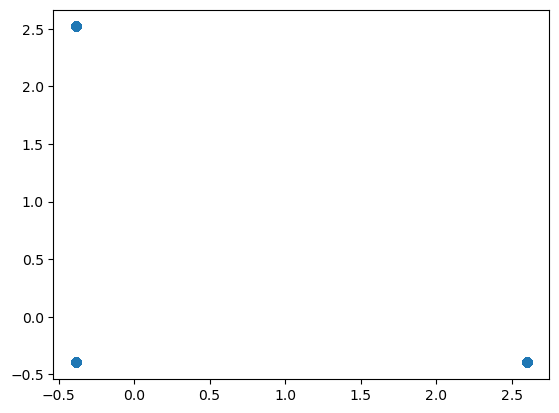

In [ ]:
plt.scatter(DFT.T[0],DFT.T[1])

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(DFT)
DFPC = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
DFPC['3']=0
DFPC

,PC1,PC2,3
0,4.216109,0.001167,0
1,4.216109,0.001167,0
2,4.216109,0.001167,0
3,3.364953,-0.321216,0
4,4.132457,-0.032976,0
...,...,...,...
2106,-0.957093,-1.411902,0
2107,-0.957093,-1.411902,0
2108,-0.957093,-1.411902,0
2109,-0.957093,-1.411902,0


In [ ]:
DFPC.values.T[0]

array([ 4.216109  ,  4.216109  ,  4.216109  , ..., -0.95709349,
       -0.95709349, -0.95709349])

(-1.2157536169521423,
 4.474769125095136,
 -1.596287372581841,
 2.4602010795223594)

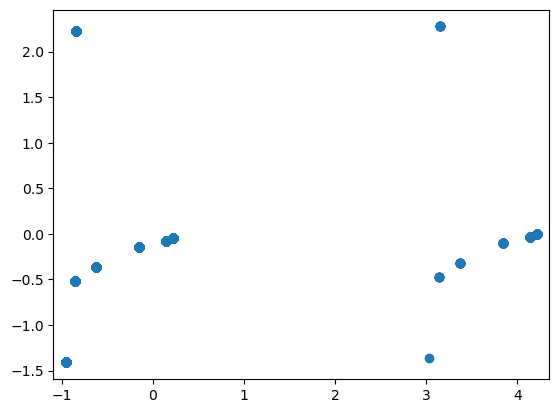

In [ ]:
plt.scatter(DFPC.values.T[0],DFPC.values.T[1])
plt.axis('equal')

(-1.2157536169521423,
 4.474769125095136,
 -0.05500000000000001,
 0.05500000000000001)

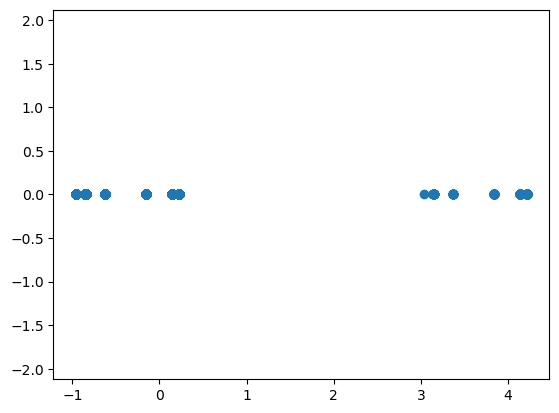

In [ ]:
plt.scatter(DFPC.values.T[0],DFPC.values.T[2])
plt.axis('equal')

#### **Reducción de Dimensionalidad con PCA para variables categóricas**

In [ ]:
#print(df_obesidad.dtypes)  # Muestra el tipo de cada columna del DataFrame
#print(type(df_obesidad))   # Muestra el tipo del objeto df_obesidad (DataFrame)
Xe = df_obesidad.values
Xe

array([['Female', 21.0, 1.62, ..., 'no', 'Public_Transportation',
        'Normal_Weight'],
       ['Female', 21.0, 1.52, ..., 'Sometimes', 'Public_Transportation',
        'Normal_Weight'],
       ['Male', 23.0, 1.8, ..., 'Frequently', 'Public_Transportation',
        'Normal_Weight'],
       ...,
       ['Female', 22.524036, 1.752206, ..., 'Sometimes',
        'Public_Transportation', 'Obesity_Type_III'],
       ['Female', 24.361936, 1.73945, ..., 'Sometimes',
        'Public_Transportation', 'Obesity_Type_III'],
       ['Female', 23.664709, 1.738836, ..., 'Sometimes',
        'Public_Transportation', 'Obesity_Type_III']], dtype=object)

In [ ]:
df_obesidad_categoricas = df_obesidad.select_dtypes(include=['object'])
df_obesidad_categoricas


,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


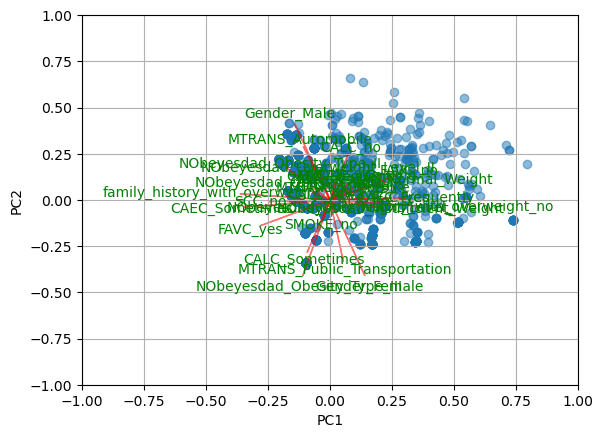

In [ ]:
# Seleccionar las variables categóricas del dataset
df_obesidad_categoricas = df_obesidad.select_dtypes(include=['object'])

# Eliminar filas con valores faltantes en las variables categóricas
df_obesidad_categoricas = df_obesidad_categoricas.dropna()

# Convertir las variables categóricas en variables dummy (One-Hot Encoding)
df_obesidad_encoded = pd.get_dummies(df_obesidad_categoricas)

# Normalizar las variables categóricas codificadas
scaler = StandardScaler()
X = scaler.fit_transform(df_obesidad_encoded)

# Aplicación de PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
columnasiris = df_obesidad_encoded.columns

# Función para el biplot
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

# Llamar la función biplot. Usar solo las dos primeras componentes principales
biplot(X_new[:, 0:2], np.transpose(pca.components_[0:2, :]), labels=columnasiris)
plt.show()

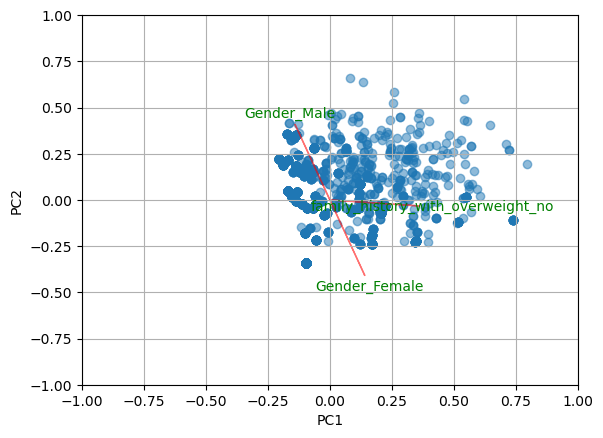

In [ ]:



# Seleccionar las variables categóricas del dataset
df_obesidad_categoricas = df_obesidad.select_dtypes(include=['object'])

# Eliminar filas con valores faltantes en las variables categóricas
df_obesidad_categoricas = df_obesidad_categoricas.dropna()

# Convertir las variables categóricas en variables dummy (One-Hot Encoding)
df_obesidad_encoded = pd.get_dummies(df_obesidad_categoricas)

# Normalizar las variables categóricas codificadas
scaler = StandardScaler()
X = scaler.fit_transform(df_obesidad_encoded)

# Aplicación de PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
columnasiris = df_obesidad_encoded.columns

# Seleccionar solo tres variables para mostrar en el biplot
columnasiris_seleccionadas = columnasiris[:3]
pca_components_seleccionados = pca.components_[:2, :3]

# Función para el biplot
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[1]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[0, i], coeff[1, i], color='r', alpha=0.5)
        plt.text(coeff[0, i] * 1.15, coeff[1, i] * 1.15, labels[i], color='g', ha='center', va='center')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

# Llamar la función biplot usando solo las tres variables seleccionadas
biplot(X_new[:, 0:2], pca_components_seleccionados, labels=columnasiris_seleccionadas)
plt.show()


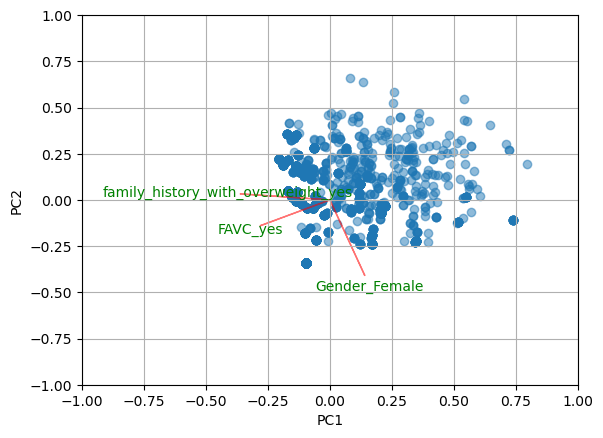

In [ ]:
# Seleccionar las variables categóricas del dataset
df_obesidad_categoricas = df_obesidad.select_dtypes(include=['object'])

# Eliminar filas con valores faltantes en las variables categóricas
df_obesidad_categoricas = df_obesidad_categoricas.dropna()

# Convertir las variables categóricas en variables dummy (One-Hot Encoding)
df_obesidad_encoded = pd.get_dummies(df_obesidad_categoricas)

# Normalizar las variables categóricas codificadas
scaler = StandardScaler()
X = scaler.fit_transform(df_obesidad_encoded)

# Aplicación de PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
columnasiris = df_obesidad_encoded.columns

# Especificar las variables que se desean mostrar en el biplot
variables_especificas = ['Gender_Female', 'family_history_with_overweight_yes', 'FAVC_yes']
columnasiris_seleccionadas = [var for var in columnasiris if var in variables_especificas]
indices_seleccionados = [columnasiris.get_loc(var) for var in columnasiris_seleccionadas]
pca_components_seleccionados = pca.components_[:, indices_seleccionados]

# Función para el biplot
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[1]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[0, i], coeff[1, i], color='r', alpha=0.5)
        plt.text(coeff[0, i] * 1.15, coeff[1, i] * 1.15, labels[i], color='g', ha='center', va='center')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

# Llamar la función biplot usando solo las variables especificadas
biplot(X_new[:, 0:2], pca_components_seleccionados, labels=columnasiris_seleccionadas)
plt.show()


In [ ]:
#Agregar las etiquetas de los clusters al DataFrame original

df_obesidad['Cluster'] = y_kmeans

#Calcular la media de cada variable cuantitativa para cada cluster
cluster_means = df_obesidad.groupby('Cluster')[['Age', 'FCVC', 'NCP', 'CH20', 'FAF', 'TUE']].mean()

#Mostrar las medias
print(cluster_means)

#Visualización de la distribución de cada variable dentro de cada cluster (opcional) 
 
for column in ['Age', 'FCVC', 'NCP', 'CH20', 'FAF', 'TUE']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x-'Cluster', y=column, data=df_obesidad) 
    plt.title('Distribución de (column) por Clúster')
    plt.show()

#### **Reducción de Dimensionalidad con t-SNE**

In [ ]:
# Datos del dataset de obesidad
X1 = df_obesidad.drop(columns=['NObeyesdad','Height','Weight'])  # Datos de las características, excluyendo la etiqueta
y1 = df_obesidad['NObeyesdad']  # Etiquetas del dataset (NObeyesdad)

# Convertir las variables categóricas en variables dummy (One-Hot Encoding)
X_encoded = pd.get_dummies(X1)

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Mostramos las dimensiones de los datos
print(f"Dimensiones de los datos de las características: {X1.shape}")
print(f"Dimensiones de las etiquetas: {y1.shape}")

Dimensiones de los datos de las características: (2111, 14)
Dimensiones de las etiquetas: (2111,)


In [ ]:
# Configuración de t-SNE con 2 componentes
tsne = TSNE(n_components=2, random_state=0)

# Reducción de la dimensionalidad
X_2d = tsne.fit_transform(X_scaled)

In [ ]:
# Mostrar las dimensiones resultantes
print(f"Dimensiones después de t-SNE: {X_2d.shape}")

Dimensiones después de t-SNE: (2111, 2)


#### **Visualización de los Resultados**

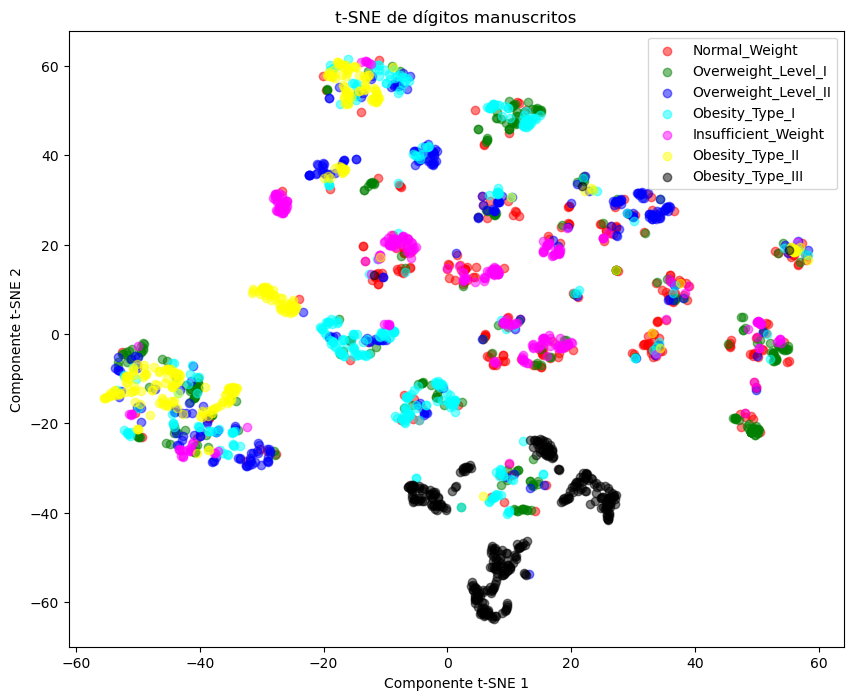

In [ ]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(10, 8))

# Colores para cada clase en el dataset de obesidad
unique_classes = y1.unique()  # Obtener las categorías únicas de NObeyesdad
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'darkgrey', 'lime']

# Dibujamos los puntos para cada clase
for i, category in enumerate(unique_classes):
    plt.scatter(X_2d[y1 == category, 0], X_2d[y1 == category, 1], 
                c=colors[i % len(colors)], label=category, alpha=0.5)

# Añadimos la leyenda y los títulos
plt.legend()
plt.title('t-SNE de dígitos manuscritos')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')

# Mostramos el gráfico
plt.show()